# WeatherPy
----

#### Observations:
* Temperature rises the closer you get to the equator
* Latitude does NOT strongly effect:
    cloudiness
    humidty
    windspeed

In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from scipy.stats import zscore
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/city_weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Import CSV file and read 
city_weather = pd.read_csv("output_data/city_weather_data.csv")
print(city_weather.head())

          City Country          Date  Latitude  Longitude  Cloudiness (%)  \
0      mataura      NZ  1.629351e+09  -46.1927   168.8643           100.0   
1      rikitea      PF  1.629351e+09  -23.1203  -134.9692           100.0   
2        sitka      US  1.629351e+09   57.0531  -135.3300            90.0   
3  barentsburg     NaN           NaN       NaN        NaN             NaN   
4    busselton      AU  1.629351e+09  -33.6500   115.3333            93.0   

   Humidity (%)  Maximum Temperature (F)  Wind Speed (mph)  
0          84.0                   46.742              3.35  
1          69.0                   69.746              9.80  
2          82.0                   57.362              3.09  
3           NaN                      NaN               NaN  
4          79.0                   60.314              4.47  


## Generate Cities List

In [2]:
# Create a list to hold lat_lngs and cities
lat_lngs = []
cities = []

# Create random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

# Use zip to map the similar index of latitude and longitude
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat and lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

638


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL                        
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Counter to sort through response
number = 0
group = 1

# Create DataFrame
city_weather_df = pd.DataFrame({"City": cities})

city_weather_df["Country"] = ""
city_weather_df["Date"] = ""      
city_weather_df["Latitude"] = ""
city_weather_df["Longitude"] = ""
city_weather_df["Cloudiness (%)"] = ""
city_weather_df["Humidity"] = ""
city_weather_df["Max Temp (F)"] = ""
city_weather_df["Wind Speed (mph)"] = ""


# API call through Cities and compile data
# Checked that weather response was correct in API documentation by printing query_url and putting into browser with Denver at end
for index, row in city_weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {number}  of Group {group} | {city}.")
        
        #print (query_url) 
        city_weather_df.loc[index, "Country"] = weather_response["sys"]["country"]    
        city_weather_df.loc[index, "Date"] = weather_response["dt"]
        city_weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        city_weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        city_weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        city_weather_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        city_weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        city_weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City weather isn't available...skipping {city}.")
         
    # To save money on API calls
    number = number + 1
    if number == 50:
        number= 0
        group = group + 1

Processing Record 0  of Group 1 | hilo.
Processing Record 1  of Group 1 | dikson.
Processing Record 2  of Group 1 | taolanaro.
City weather isn't available...skipping taolanaro.
Processing Record 3  of Group 1 | mahebourg.
Processing Record 4  of Group 1 | punta arenas.
Processing Record 5  of Group 1 | flinders.
Processing Record 6  of Group 1 | port elizabeth.
Processing Record 7  of Group 1 | thanh hoa.
Processing Record 8  of Group 1 | vaini.
Processing Record 9  of Group 1 | kourou.
Processing Record 10  of Group 1 | marcona.
City weather isn't available...skipping marcona.
Processing Record 11  of Group 1 | bethel.
Processing Record 12  of Group 1 | khonuu.
City weather isn't available...skipping khonuu.
Processing Record 13  of Group 1 | hermanus.
Processing Record 14  of Group 1 | pangnirtung.
Processing Record 15  of Group 1 | gamba.
Processing Record 16  of Group 1 | mount vernon.
Processing Record 17  of Group 1 | saint-augustin.
Processing Record 18  of Group 1 | tsihombe.


Processing Record 17  of Group 4 | yining.
Processing Record 18  of Group 4 | mataura.
Processing Record 19  of Group 4 | chilca.
Processing Record 20  of Group 4 | karaj.
Processing Record 21  of Group 4 | dunedin.
Processing Record 22  of Group 4 | cristalina.
Processing Record 23  of Group 4 | binabalian.
Processing Record 24  of Group 4 | nichinan.
Processing Record 25  of Group 4 | isoka.
Processing Record 26  of Group 4 | vila.
Processing Record 27  of Group 4 | trelew.
Processing Record 28  of Group 4 | progreso.
Processing Record 29  of Group 4 | artyk.
City weather isn't available...skipping artyk.
Processing Record 30  of Group 4 | rawson.
Processing Record 31  of Group 4 | sao filipe.
Processing Record 32  of Group 4 | winburg.
Processing Record 33  of Group 4 | pa sang.
Processing Record 34  of Group 4 | matara.
Processing Record 35  of Group 4 | geraldton.
Processing Record 36  of Group 4 | marystown.
Processing Record 37  of Group 4 | souillac.
Processing Record 38  of Gr

Processing Record 38  of Group 7 | lesosibirsk.
Processing Record 39  of Group 7 | araouane.
Processing Record 40  of Group 7 | henties bay.
Processing Record 41  of Group 7 | tangshan.
Processing Record 42  of Group 7 | chippewa falls.
Processing Record 43  of Group 7 | yershichi.
Processing Record 44  of Group 7 | chapais.
Processing Record 45  of Group 7 | elat.
Processing Record 46  of Group 7 | parabel.
Processing Record 47  of Group 7 | kirakira.
Processing Record 48  of Group 7 | mys shmidta.
City weather isn't available...skipping mys shmidta.
Processing Record 49  of Group 7 | hanmer springs.
Processing Record 0  of Group 8 | khandyga.
Processing Record 1  of Group 8 | lugo.
Processing Record 2  of Group 8 | puerto escondido.
Processing Record 3  of Group 8 | almeirim.
Processing Record 4  of Group 8 | tecoanapa.
Processing Record 5  of Group 8 | wesselsbron.
Processing Record 6  of Group 8 | attawapiskat.
City weather isn't available...skipping attawapiskat.
Processing Record

Processing Record 3  of Group 11 | myanaung.
Processing Record 4  of Group 11 | san francisco.
Processing Record 5  of Group 11 | sao joao da barra.
Processing Record 6  of Group 11 | road town.
Processing Record 7  of Group 11 | kitimat.
Processing Record 8  of Group 11 | san quintin.
Processing Record 9  of Group 11 | malkangiri.
Processing Record 10  of Group 11 | salym.
Processing Record 11  of Group 11 | mitu.
Processing Record 12  of Group 11 | inirida.
Processing Record 13  of Group 11 | shenjiamen.
Processing Record 14  of Group 11 | viedma.
Processing Record 15  of Group 11 | boyany.
Processing Record 16  of Group 11 | perieti.
Processing Record 17  of Group 11 | tabou.
Processing Record 18  of Group 11 | klyuchi.
Processing Record 19  of Group 11 | san policarpo.
Processing Record 20  of Group 11 | zhanjiang.
Processing Record 21  of Group 11 | rocha.
Processing Record 22  of Group 11 | ferreira do alentejo.
Processing Record 23  of Group 11 | mezen.
Processing Record 24  of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Get return count
print(len(city_weather_df))

638


In [5]:
# Get row count/column
city_weather_df.count()

City                638
Country             638
Date                638
Latitude            638
Longitude           638
Cloudiness (%)      638
Humidity            638
Max Temp (F)        638
Wind Speed (mph)    638
dtype: int64

In [6]:
# Make dataframe from strings > float so the graphs function
pd.to_numeric(city_weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(city_weather_df["Humidity"]).astype(float)
pd.to_numeric(city_weather_df["Latitude"]).astype(float)
pd.to_numeric(city_weather_df["Longitude"]).astype(float)
pd.to_numeric(city_weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(city_weather_df["Wind Speed (mph)"]).astype(float)

city_weather = pd.DataFrame(city_weather)
print(city_weather_df.head())

           City Country        Date Latitude Longitude Cloudiness (%)  \
0          hilo      US  1629593256  19.7297   -155.09              1   
1        dikson      RU  1629593256  73.5069   80.5464            100   
2     taolanaro                                                         
3     mahebourg      MU  1629593257 -20.4081      57.7             20   
4  punta arenas      CL  1629593257   -53.15  -70.9167             90   

  Humidity Max Temp (F) Wind Speed (mph)  
0       69         84.2             6.17  
1       96       41.954             6.55  
2                                         
3       88       65.516             2.57  
4       56       37.778              3.6  


In [7]:
#Export as CSV
city_weather.to_csv("output_data/weather_data.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#I didn't have any above 100% Humidty

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The max temperatures are highest near the equator.


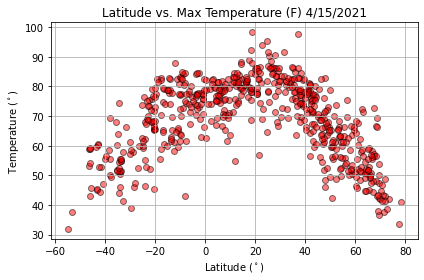

In [9]:
plt.scatter(pd.to_numeric(city_weather_df["Latitude"]).astype(float), pd.to_numeric(city_weather_df["Max Temp (F)"]).astype(float),  alpha=.5, facecolor="red", edgecolors="black", marker ="o")
plt.title(f"Latitude vs. Max Temperature (F) 4/15/2021")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Temperature ($^\circ$)")
plt.grid(True) 
plt.tight_layout()
print(f"The max temperatures are highest near the equator.")
# Save figure to Images folder
plt.savefig("Images/Latitude vs Temperature.png")
plt.show()

## Latitude vs. Humidity Plot

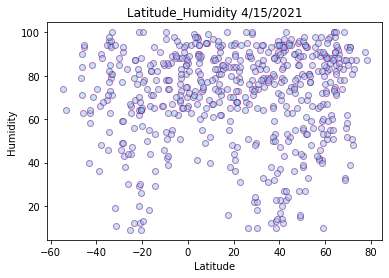

In [12]:
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Humidity (%)"]).astype(float), facecolors="skyblue", edgecolors="purple", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title(f"Latitude_Humidity 4/15/2021")

plt.savefig("Images/Latitude vs Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

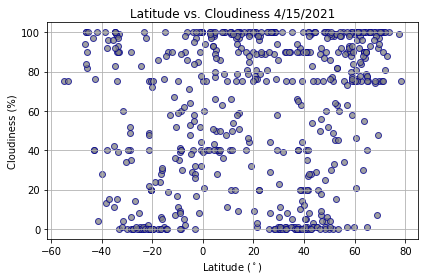

In [13]:
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Cloudiness (%)"]).astype(float), alpha=.75, facecolors= "grey", edgecolors="darkblue")

plt.title(f"Latitude vs. Cloudiness 4/15/2021")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Cloudiness (%)")
plt.grid(True) 
plt.tight_layout()

plt.savefig("Images/latitude_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

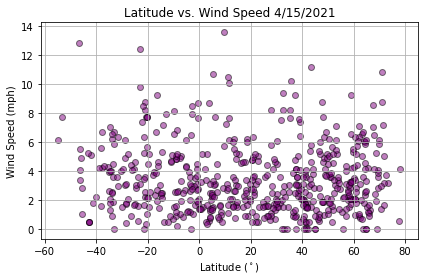

In [14]:
plt.scatter(pd.to_numeric(city_weather["Latitude"]).astype(float), pd.to_numeric(city_weather["Wind Speed (mph)"]).astype(float), alpha=.5, facecolors= "purple", edgecolors="k")
plt.title(f"Latitude vs. Wind Speed 4/15/2021")
plt.xlabel("Latitude ($^\circ$)")
plt.ylabel("Wind Speed (mph)")
plt.grid(True) 
plt.tight_layout()
plt.savefig("Images/latitude vs wind speed.png")
plt.show()

## Linear Regression

In [15]:
# Create Northern and Southern Hemisphere DataFrames
north = city_weather_df.loc[pd.to_numeric(city_weather_df["Latitude"]).astype(float) > 0, :]
south = city_weather_df.loc[pd.to_numeric(city_weather_df["Latitude"]).astype(float) < 0, :]


# Linear Regression function
def linear_regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -0.47x + 87.47
The r-squared is : -0.7285285484662214, which shows a strong correlation
The regression displays a strong, negative correlation, so the further north you go the lower the temperature


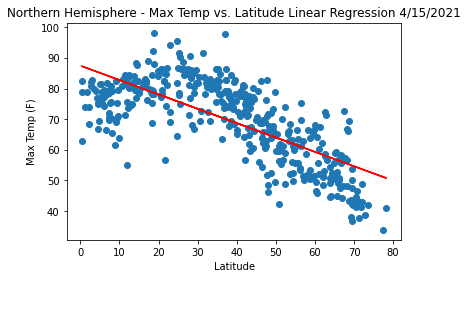

In [16]:
# Convert the values to float for graph 
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Max Temp (F)']).astype(float)

# Manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a strong correlation")
print("The regression displays a strong, negative correlation, so the further north you go the lower the temperature")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression 4/15/2021")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("Images/Northern - Max Temp_Latitude LR.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.64x + 79.39
The r-squared is : 0.7121532997330673, which shows a strong correlation
The regression displays a strong, positive correlation, so the closer your proximity to the equator, the hotter it gets


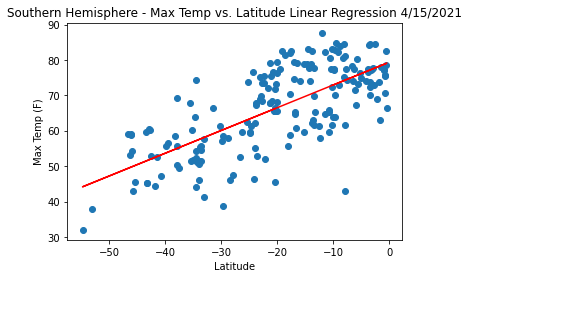

In [17]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Max Temp (F)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a strong correlation")
print("The regression displays a strong, positive correlation, so the closer your proximity to the equator, the hotter it gets")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Southern - Max Temp vs. Latitude LR.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.09x + 78.79
The r-squared is : -0.09350894026734498, which shows a weak correlation
The regression displays a little to no correlation, so the further north you go is irrelevant to the humidity level


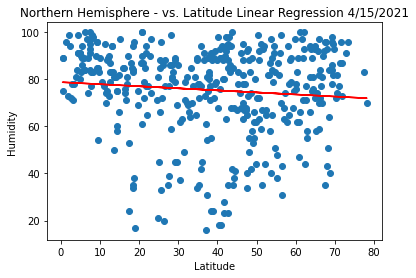

In [18]:
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Humidity']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little to no correlation, so the further north you go is irrelevant to the humidity level")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Northern-Humidity_Latitude LR.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.12x + 72.89
The r-squared is : 0.08462469314407466, which shows a weak correlation
The regression displays a little to no correlation, proximity to the equator does not effect humidity


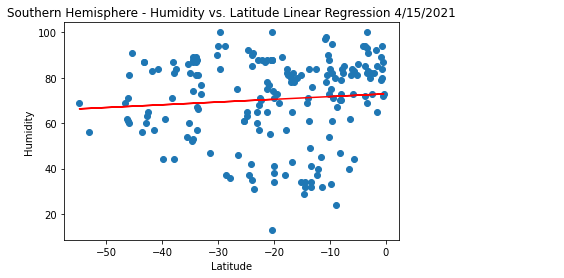

In [19]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Humidity']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little to no correlation, proximity to the equator does not effect humidity")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Southern-Humidit_Latitude LR.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.03x + 55.88
The r-squared is : 0.012959680102996467, which shows a weak correlation
The regression displays a little correlation, meaning the further north you go does not effect cloudiness


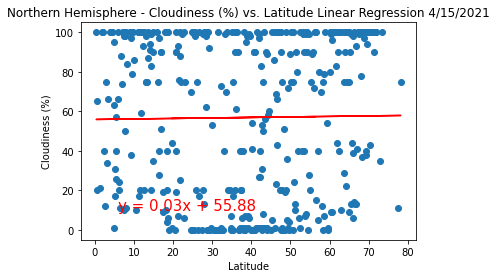

In [20]:
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Cloudiness (%)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, meaning the further north you go does not effect cloudiness")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Northern-Cloudiness_Latitude LR.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = -0.16x + 34.27
The r-squared is : -0.05446230361026427, which shows a weak correlation
The regression displays a little correlation, meaning your proximity to the equator does not effect cloudiness


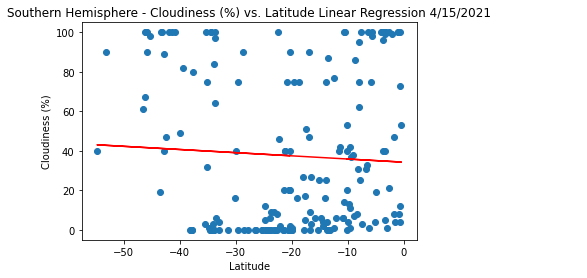

In [21]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Cloudiness (%)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, meaning your proximity to the equator does not effect cloudiness")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Southern-Cloudiness_Latitude LR.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 2.79
The r-squared is : 0.07447871460071324, which shows a weak correlation
The regression displays a little correlation, meaning your proximity to the equator does not effect wind speed


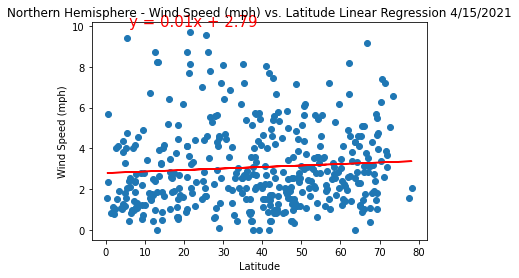

In [22]:
x_values = pd.to_numeric(north['Latitude']).astype(float)
y_values = pd.to_numeric(north['Wind Speed (mph)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, meaning your proximity to the equator does not effect wind speed")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Northern-Wind Speed_Latitude LR.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 2.62
The r-squared is : -0.26692228281971436, which shows a weak correlation
The regression displays a little correlation, so the more towards the equator you go doesn't effect wind speed


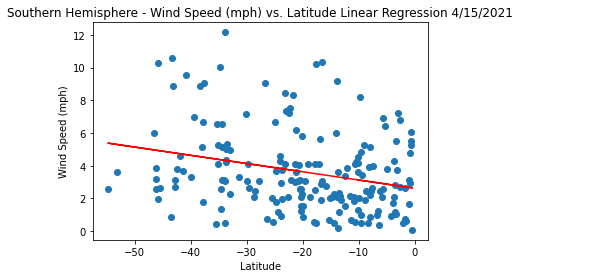

In [23]:
x_values = pd.to_numeric(south['Latitude']).astype(float)
y_values = pd.to_numeric(south['Wind Speed (mph)']).astype(float)

# Linear Regression equation not working, so use manual input
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is : {rvalue}, which shows a weak correlation")
print("The regression displays a little correlation, so the more towards the equator you go doesn't effect wind speed")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 4/15/2021')

plt.savefig("Images/Southern-Wind Speed_Latitude LR.png")